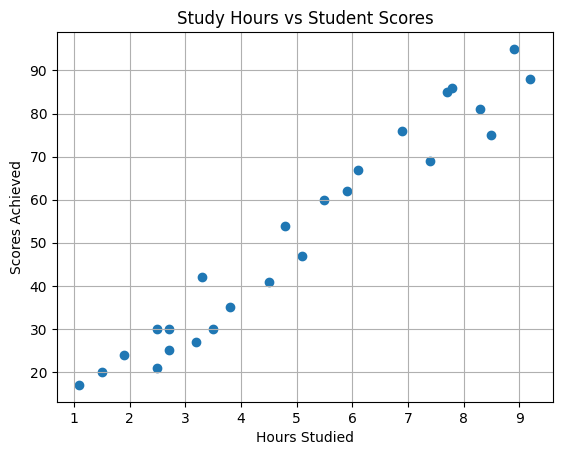

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read dataset
dataset = pd.read_csv('student_scores.csv')

# Scatter plot of Hours vs Scores
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Study Hours vs Student Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Achieved')
plt.grid(True)
plt.show()


In [2]:
# Separate input (X) and output (Y) variables
X = dataset.iloc[:, :-1].values   # All rows, all columns except the last
Y = dataset.iloc[:, 1].values     # All rows, only the second column

# Display feature matrix
print(Y)


[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Y = Mx + C -> Basic equation of the line

In [3]:
class Model():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def predict(self, X):
        return X.dot(self.slope) + self.const

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.slope = np.zeros(self.n)
        self.const = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dw = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m

        self.slope = self.slope - self.learning_rate * dw
        self.const = self.const - self.learning_rate * db
        return self

In [4]:
model = Model(learning_rate=0.01, iterations=1000)
model.fit(X, Y)


In [5]:
Y_pred = model.predict(X)
print(Y_pred)


[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


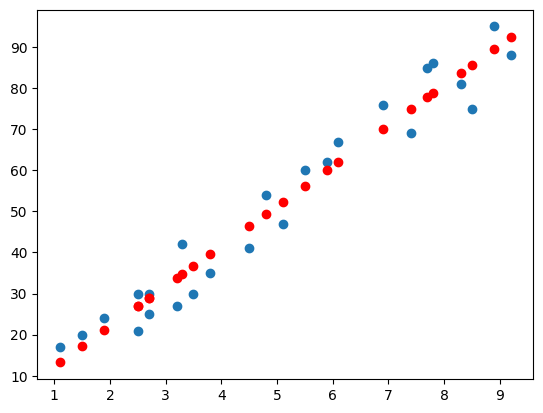

In [6]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.scatter(X, Y_pred, color='red')
plt.show()


In [8]:
print(model.slope, model.const)

[9.77890599] 2.4644522714760995


Iteration = 1, Loss = 39.247134148454194
Iteration = 1, Loss = 26.059992416813227
Iteration = 1, Loss = 20.455585371032353
Iteration = 1, Loss = 17.94209784097048
Iteration = 2, Loss = 16.692099448814048
Iteration = 3, Loss = 15.962033523754586
Iteration = 4, Loss = 15.449266450283158
Iteration = 5, Loss = 15.030535791280563
Iteration = 6, Loss = 14.655551105008835
Iteration = 7, Loss = 14.30371074629507
Iteration = 8, Loss = 13.966494198087787
Iteration = 9, Loss = 13.64029918914871
Iteration = 10, Loss = 13.323527744255061
Iteration = 11, Loss = 13.015400698960287
Iteration = 12, Loss = 12.715475354669497
Iteration = 13, Loss = 12.423449172952262
Iteration = 14, Loss = 12.13907983267419
Iteration = 15, Loss = 11.862152625666967
Iteration = 16, Loss = 11.59246711186081
Iteration = 17, Loss = 11.329831611278387
Iteration = 18, Loss = 11.074060886130365
Iteration = 19, Loss = 10.824975122660641
Iteration = 20, Loss = 10.582399443694772


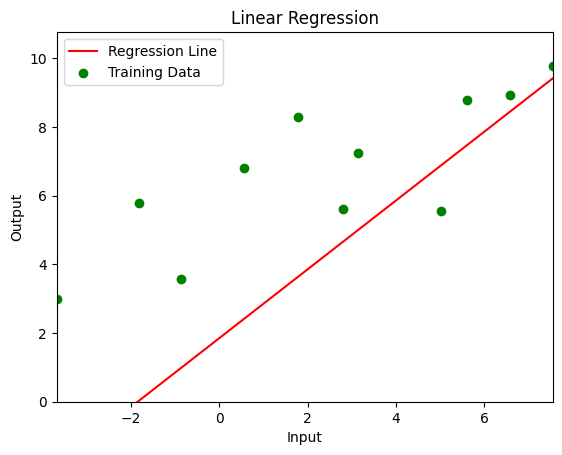

In [14]:
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1)
        self.parameters['c'] = np.random.uniform(0, 1)

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)

        # FIX: initialize line with x_vals instead of empty arrays
        line, = ax.plot(x_vals,
                        self.parameters['m'] * x_vals + self.parameters['c'],
                        color='red', label='Regression Line')

        ax.scatter(train_input, train_output, color='green', label='Training Data')
        ax.set_xlim(min(train_input), max(train_input))
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


# Example usage:
X = np.array([-3.68, -1.82, 6.57, 1.77, 3.13, 2.8, 7.55, 5.02, 5.6, 0.56, -0.88])
Y = np.array([2.98, 5.78, 8.92, 8.3, 7.23, 5.6, 9.76, 5.55, 8.77, 6.8, 3.58])

model = LinearRegression()
parameters, loss = model.train(X, Y, learning_rate=0.01, iters=20)
